# ALGORITMOS DE BUSUQEDA 

## PREPARACION DE DATOS

### IMPORTAR LIBRERIAS

In [1]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para graficar
import pandas as pd #libreria de manejo de datos
import scipy as sp #libreria python cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
from community import community_louvain
import seaborn as sns


### Creacion DataFrame, red y Caracteristicas

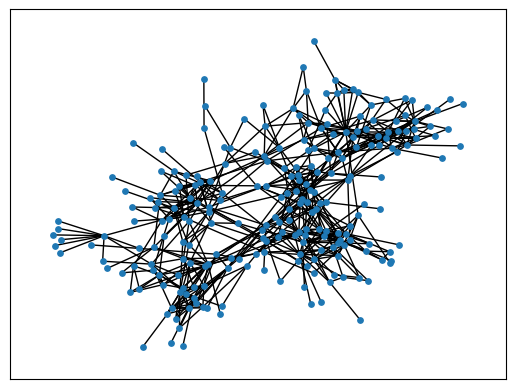

In [2]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [3]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [4]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')
adj=DFadj.to_numpy()


### Creacion red auxiliar

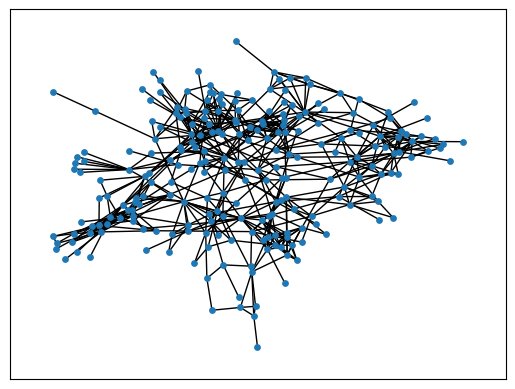

In [5]:
G1=nx.from_numpy_array(adyacencia)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [6]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


#### Distribucion de grados de la red de numeros

In [7]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
#listdegree1=list(degree)
#degree2=pd.DataFrame(listdegree1, dtype = np.float64)
degree1

,0,1
0,0,8
1,1,3
2,2,14
3,3,2
4,4,10
...,...,...
231,231,12
232,232,1
233,233,7
234,234,4


#### Distribucion de grados de la red animal

In [8]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


#### Grado medio

In [9]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

In [10]:
meandegreeani=np.mean(degree1ani.iloc[:,1])
meandegreeani

5.177966101694915

#### frecuencias de cada grado

In [11]:
f=pd.value_counts(degree1.iloc[:,1])
f

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

### Coeficiente de Clustering

In [12]:
coef_clustering=nx.average_clustering(G1)
coef_clustering

0.3296154175391464

#### Red graficada con clsuters

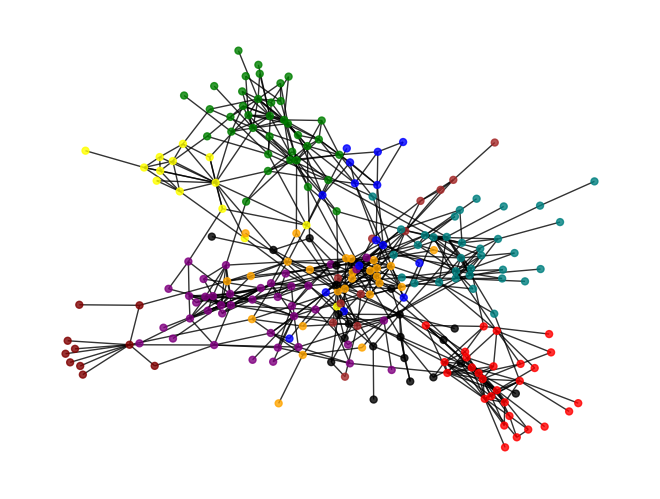

In [13]:
cluster=community_louvain.best_partition(G1)
unique_coms = np.unique(list(cluster.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster[node]] for node in G1.nodes()]
nx.draw(G1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)


<Axes: >

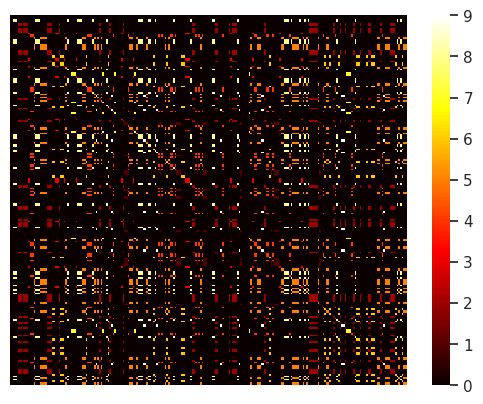

In [14]:
mascara = np.zeros_like(DFadj)
for i, cluster_i in cluster.items():
    for j, cluster_j in cluster.items():
        if cluster_i == cluster_j:
            mascara[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mascara, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

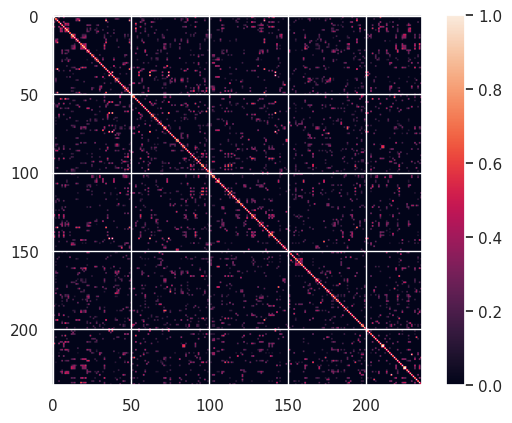

In [15]:
cosine_sim_matrix = cosine_similarity(adyacencia)
plt.imshow(cosine_sim_matrix)
plt.colorbar()

### camino mas corto promedio

In [16]:
caminomcort=nx.average_shortest_path_length(G1)
caminomcort

4.4232960692390915

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

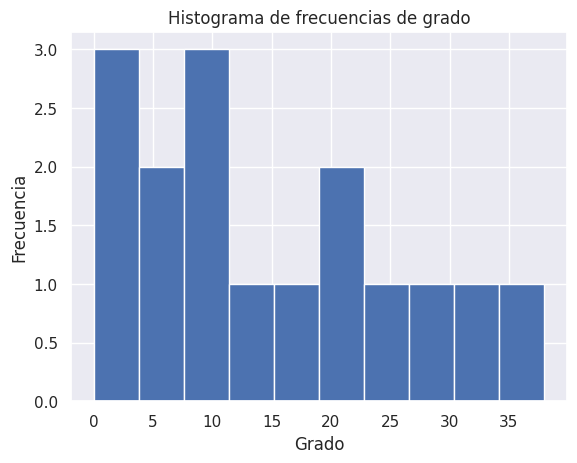

In [17]:
hist=nx.degree_histogram(G1)
plt.hist(hist)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

La red tiene un camino mas corto promedio de 4.423, un coeficiente de clustering promedio de 0.329, del histograma anterior se puede ver que existen pocos nodos con alto grado, mientras que hay muchos con un grado bajo, esto deja a una red de tipo small-world. wattz-strogatz 1988.

# BUSQUEDA POR GRADO DE NODO

In [18]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    #walked_nodes = [current_node]
    walked_nodes = []
    while len(walked_nodes) < nx.number_of_nodes(G1): #nx.number_of_nodes(G1)
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [19]:
nodo=0 #pasos en la red
i=0 #contador para matriz
matrix=[] #matriz de resultados
while i < nx.number_of_nodes(G1): #ciclo que crea la matriz nx.number_of_nodes(G1)
    while nodo < nx.number_of_nodes(G1): #ciclo que recorre la red nx.number_of_nodes(G1)+1
        pp=walked_nodes_by_degree_prob(G1,nodo)
        nodo+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
matrixDF=pd.DataFrame(matrix)
matrixDF.to_csv("matrizF.csv")
response=matrixDF.to_numpy()

In [20]:
unique_values, counts = np.unique(matrix, return_counts=True)

In [21]:
elementoi=unique_values
arreglo=list(G.nodes())
palabra=[]
for elemento in elementoi:
   palabra.append(arreglo[elemento])
#listapalabra=np.reshape(palabra,(1,-1))
frecuenciapalabra=[palabra,counts]
frecuenciapalabraDF=pd.DataFrame(frecuenciapalabra)
frecuenciapalabraDF


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,abeja,abejorro,aguila,aguilucho,arana,arenque,atun,avispa,bacalao,barbo,...,tortuga,trucha,lucio,tucan,urogallo,vaca,verderol,vibora,yegua,zorro
1,489,58,980,47,594,7,639,380,88,266,...,76,1194,9,14,2,1137,7,247,181,138


In [22]:
g = nx.Graph()

# Itera sobre todas las filas de la matriz de caminata
for row in response:
    # Crea una lista de aristas conectando nodos consecutivos en la fila
    edges = [(row[i], row[i+1]) for i in range(len(row)-1)]
    # Agrega las aristas al grafo
    g.add_edges_from(edges)

# Muestra el grafo resultante
#nx.draw(g, with_labels=False,node_size=15)
adj1=nx.adjacency_matrix(g).todense()
adj1DF=pd.DataFrame(adj1)

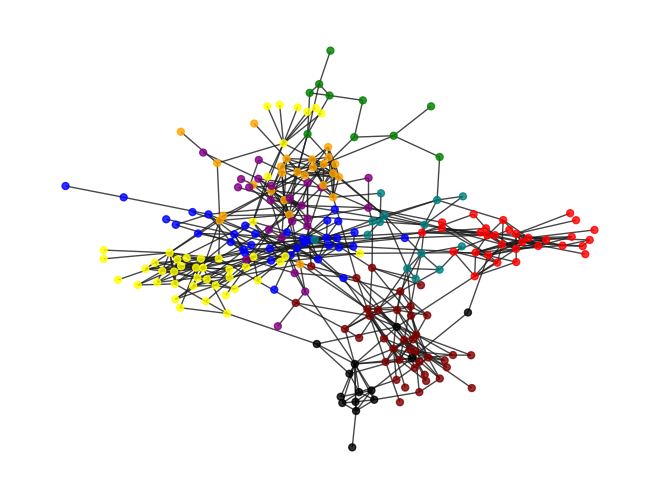

In [23]:
cluster1=community_louvain.best_partition(g)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g.nodes()]
nx.draw(g, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

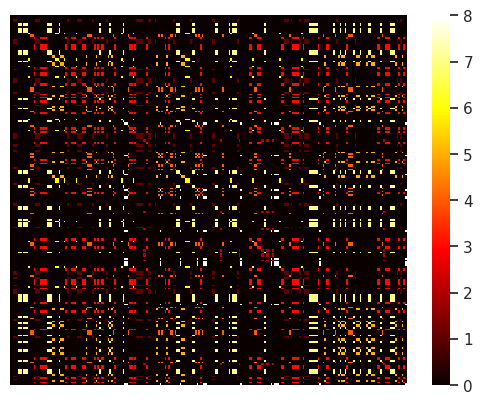

In [24]:
mask = np.zeros_like(adj1DF)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

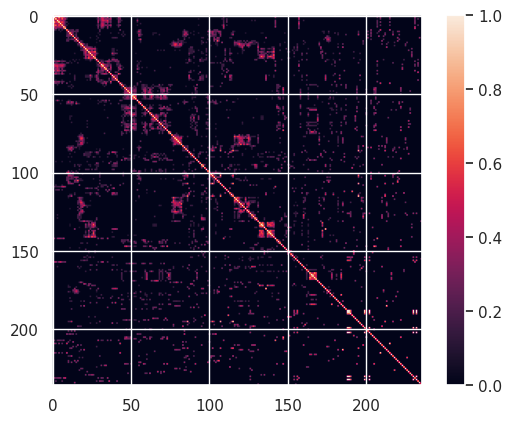

In [25]:
cosine_sim_matrix1 = cosine_similarity(adj1)
plt.imshow(cosine_sim_matrix1)
plt.colorbar()

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

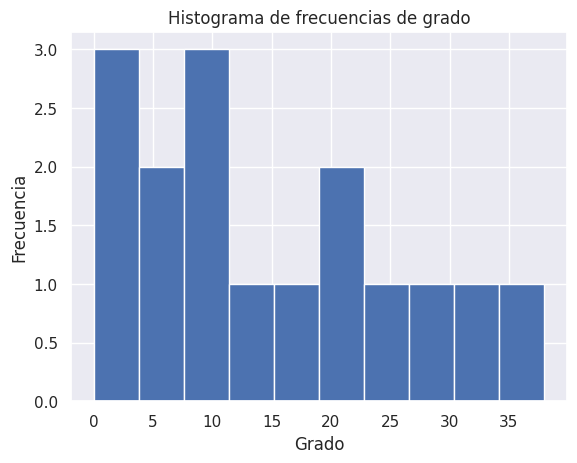

In [26]:
hist1=nx.degree_histogram(g)
plt.hist(hist1)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

In [27]:
degreee=nx.degree(g)
degreee1=pd.DataFrame(degreee)
np.mean(degreee1.iloc[:,1])
f=pd.value_counts(degreee1.iloc[:,1])
f

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

In [28]:
coef_clusteringg=nx.average_clustering(g)
coef_clusteringg

0.3296154175391463

### Resultados

La red creada a aprtir de la caminata en muy similar a la anterior, tiene el mismo valor del camino mas corto, la misma distribucion de grado, sin embargo el coeficiente de clustering es un poco mas grade, aun asi la diferencia es despreciable. Hay un menor numero de clusters, pero las graficas de calor muestran que el caminante aleatorio esta reproduciendo la matriz.

Abbot et al. 2015. Comentaba que cualquier representacion en cunjuntp con un algoritmo de busqueda definido para ella, reproducira el agrupamiento presente en la memoria semantica.

# ALGORITMO DE BUSQUEDA CRW+PV

## CRW

Para calcular un Random Wlaker es necesario obtener una matriz de transicion dada por:


$M_{ij}=\frac{L_{ij}}{\sum_{k=1}^{n}L_{kj}}$

El numerador es el grado del nodo, y $L$ la matriz de adyacencia. Abbot et al.

In [29]:
#sumar las filas de la matriz de adyacencia
sum_fila=np.sum(DFadj, axis=1)
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)
TransMatrixDF=pd.DataFrame(TransMatrix)
TransMatrixDF.to_csv('transitionM.csv')
T=TransMatrixDF.to_numpy()

In [30]:
Colsum=TransMatrixDF.sum(axis=0)
Colsum

0      0.996825
1      0.339286
2      3.497655
3      0.162338
4      1.795635
         ...   
231    1.450000
232    0.111111
233    1.590873
234    0.342857
235    1.080952
Length: 236, dtype: float64

In [31]:
Rowsum=TransMatrixDF.sum(axis=1)
Rowsum

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
Length: 236, dtype: float64

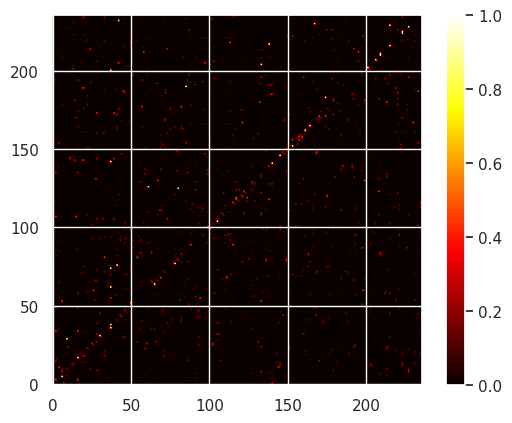

In [32]:
#Mapa de calor
plt.imshow(TransMatrixDF,cmap="hot",origin='lower')
plt.colorbar()

La matriz de transicion depende del grado de cada nodo, esto es la suma de los valores de cada fila, para normalizarsa se divide entre esta suma cada celda de la matriz.

In [33]:
def random_walk_censored(P, steps, start):
    visited = [start]
    curr = start
    for i in range(steps):
        curr = np.random.choice(np.arange(P.shape[0]), p=P[curr])
        if curr not in visited:
            visited.append(curr)
    return visited

In [35]:
n_walks = 1  # número de caminatas por nodo
walks_list = []
n=len(TransMatrix)
for start in range(n):
    walks = []
    for i in range(n_walks):
        walk = random_walk_censored(TransMatrix, 236, start)
        walks.append(walk)
    walks_list.append(walks)
walks_list

[[[0,
   140,
   191,
   91,
   138,
   4,
   141,
   1,
   85,
   215,
   216,
   229,
   102,
   103,
   206,
   207,
   28,
   131,
   208,
   213,
   22,
   108,
   184,
   137,
   67,
   86,
   16,
   174,
   113,
   235,
   94,
   115,
   89,
   92,
   51,
   198,
   87,
   226,
   220,
   179,
   227,
   59,
   134,
   99,
   6,
   9,
   10,
   145,
   13,
   201,
   202,
   37,
   14,
   231,
   33,
   223,
   224,
   12,
   203,
   88,
   193,
   25,
   93,
   47,
   46,
   146,
   101,
   48,
   98,
   233,
   70,
   38,
   142,
   55,
   36,
   30,
   31,
   45,
   35,
   63,
   127,
   154,
   90,
   153,
   74]],
 [[1,
   0,
   127,
   138,
   118,
   4,
   139,
   191,
   91,
   63,
   35,
   140,
   7,
   129,
   56,
   85,
   233,
   154,
   101,
   102,
   206,
   103,
   195,
   99,
   134,
   59,
   137,
   69,
   184,
   111,
   151,
   22,
   220,
   179,
   227,
   8,
   228,
   108,
   67,
   199,
   181,
   182,
   178,
   88,
   166,
   96,
   98,
   136,
   61

In [36]:
adj_matrix1 = np.zeros((236,236 ))
for node_walks in walks_list:
    for walk in node_walks:
        for i in range(len(walk)-1):
            adj_matrix1[walk[i], walk[i+1]] += 1
            adj_matrix1[walk[i+1], walk[i]] += 1

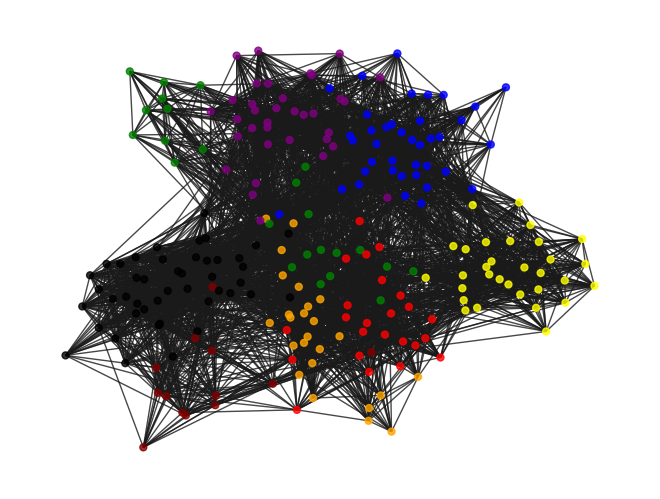

In [37]:
g1=nx.Graph(adj_matrix1)
cluster1=community_louvain.best_partition(g1)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g1.nodes()]
nx.draw(g1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

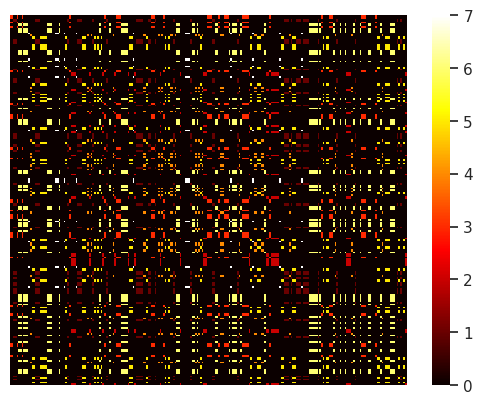

In [38]:
mask1 = np.zeros_like(adj_matrix1)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask1[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask1, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

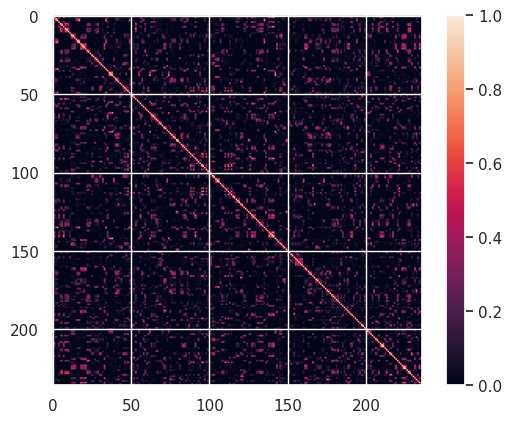

In [39]:
cosine_sim_matrix1 = cosine_similarity(adj_matrix1)
plt.imshow(cosine_sim_matrix1)
plt.colorbar()

In [40]:
coef_clusteringg=nx.average_clustering(g1)
coef_clusteringg

0.44595153445124336